https://www.kaggle.com/shubh0799/churn-modelling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

**1000 samples, 14 feature variables**

**Remove the first 3 columns**

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Continuous: CreditScore, Age, Balance, EstimatedSalary**

**Ordinal: Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember**

**Nominal: Geography**

In [8]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


<AxesSubplot:>

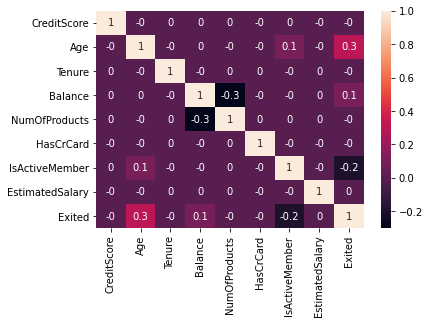

In [9]:
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

## SDA

### Histogram

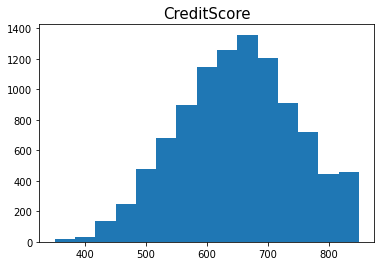

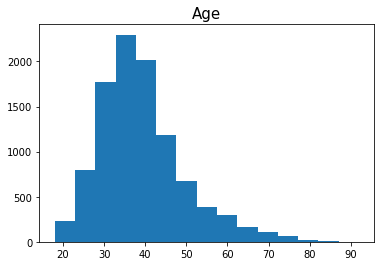

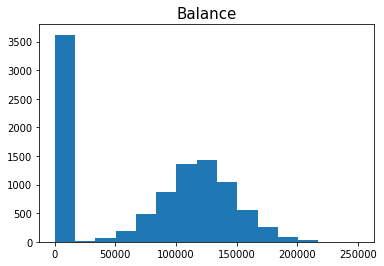

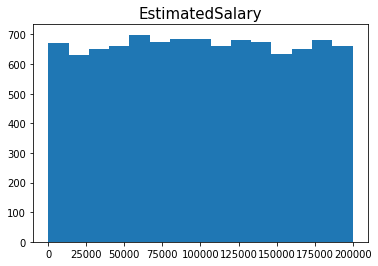

In [10]:
for i in ["CreditScore", "Age", "Balance", "EstimatedSalary"]:
    plt.title(i, fontsize=15)
    df[i].hist(bins=15, grid=False)
    plt.show()

### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d532105550>,
 'caps': [<matplotlib.lines.Line2D at 0x1d532105c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5321051c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d53210f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d53210f760>],
 'means': []}

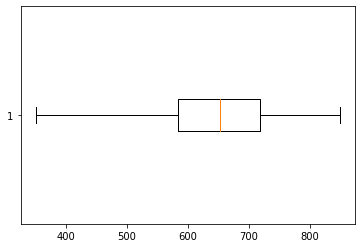

In [65]:
plt.boxplot(df['CreditScore'], vert=False, whis=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d532163880>,
 'caps': [<matplotlib.lines.Line2D at 0x1d532163fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5321634f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d532170700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d532170a90>],
 'means': []}

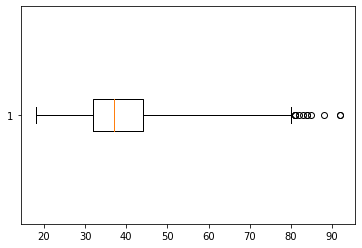

In [66]:
plt.boxplot(df['Age'], vert=False, whis=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5321c7d00>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5321d8460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5321c7970>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5321d8b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5321d8f10>],
 'means': []}

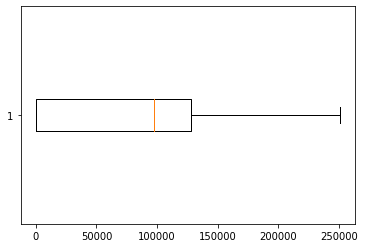

In [67]:
plt.boxplot(df['Balance'], vert=False, whis=3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d532234910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d532242070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d532234580>],
 'medians': [<matplotlib.lines.Line2D at 0x1d532242790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d532242b20>],
 'means': []}

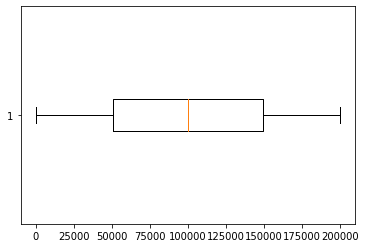

In [69]:
plt.boxplot(df['EstimatedSalary'], vert=False, whis=3)

### bar chart

<AxesSubplot:xlabel='Gender'>

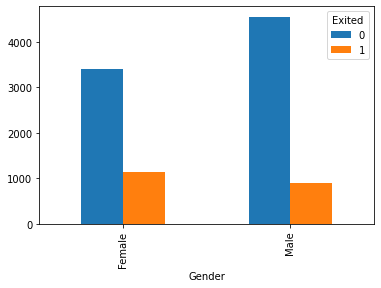

In [14]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='Tenure'>

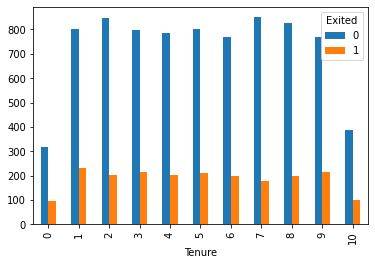

In [15]:
pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='Geography'>

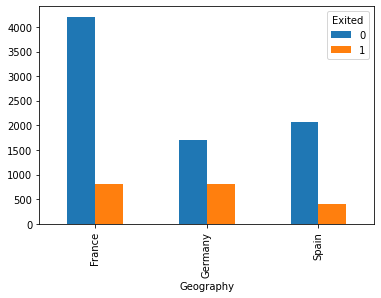

In [13]:
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='NumOfProducts'>

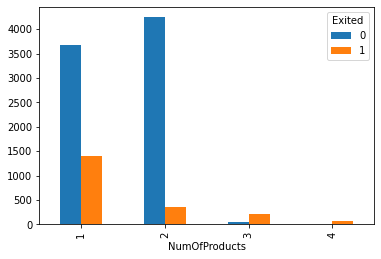

In [16]:
pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='HasCrCard'>

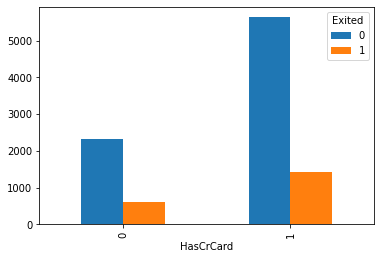

In [17]:
pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar')

<AxesSubplot:xlabel='IsActiveMember'>

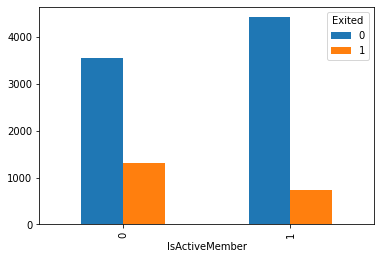

In [18]:
pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar')

<AxesSubplot:ylabel='Geography'>

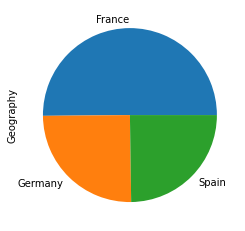

In [27]:
df['Geography'].value_counts().plot.pie()

# Data Cleaning and Transformation

In [29]:
from scipy import stats

In [34]:
z_score = stats.zscore(df['Age'])

len(z_score[np.abs(z_score) > 3])

133